In [174]:
import numpy as np 
import pandas as pd

In [175]:
file="data/Mall_Customers.csv"

In [176]:
data=pd.read_csv(file)

In [177]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [178]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [180]:
#converting Gender to a categorical variable
data=pd.get_dummies(data,columns=['Genre'])

In [181]:
data.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Genre_Female', 'Genre_Male'],
      dtype='object')

In [182]:
data.drop(['Genre_Female'],inplace=True,axis=1)

In [183]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [184]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.058109
Genre_Male,0.057400,0.060867,0.056410,-0.058109,1.000000


<AxesSubplot: >

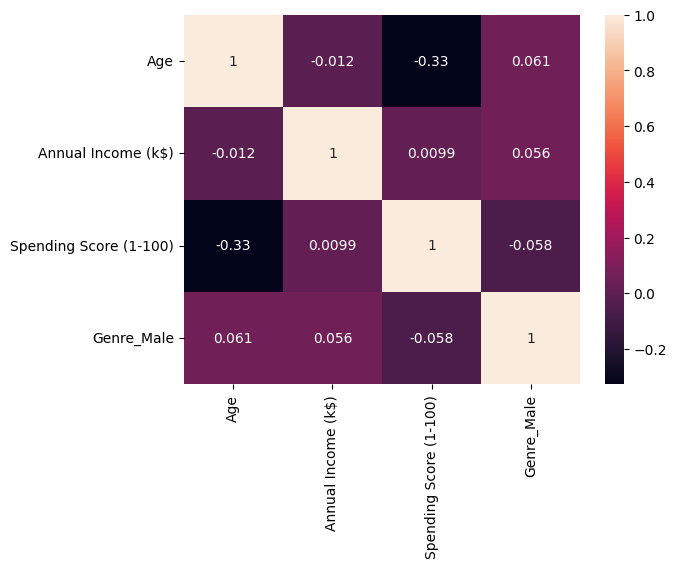

In [185]:
sns.heatmap(data.corr().iloc[-4:, -4:], annot=True)

<AxesSubplot: xlabel='Age', ylabel='Density'>

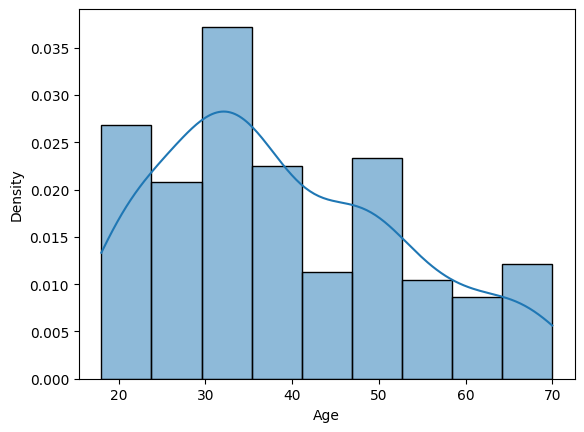

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Age'], kde=True, stat="density")

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

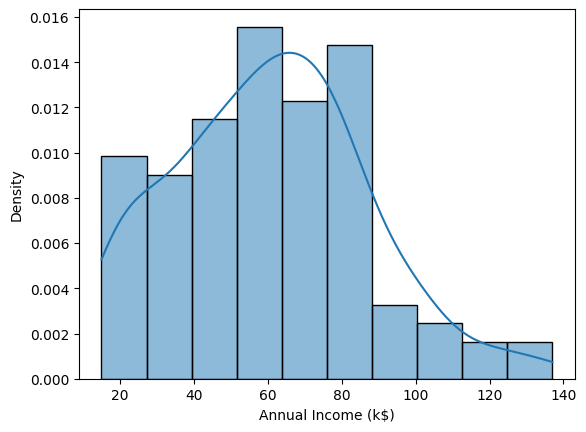

In [187]:
sns.histplot(data['Annual Income (k$)'], kde=True, stat="density")

<AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Density'>

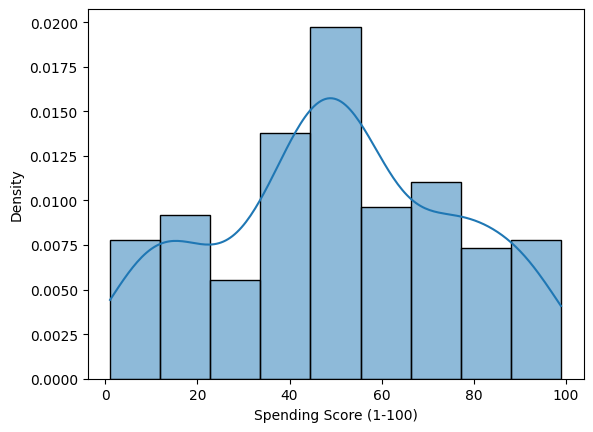

In [188]:
sns.histplot(data["Spending Score (1-100)"], kde=True, stat="density")

In [189]:
data.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Genre_Male'],
      dtype='object')

In [190]:
#Standardising 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

data['scaled_age'] = preprocessing.scale(data['Age'])
data['scaled_annual_income'] = preprocessing.scale(data['Annual Income (k$)'])
data['scaled_spending_score'] = preprocessing.scale(data['Spending Score (1-100)'])

sc = StandardScaler()
x = sc.fit_transform(data.iloc[:, -4:])

In [191]:
data.iloc[:, -4:]

,Genre_Male,scaled_age,scaled_annual_income,scaled_spending_score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


In [192]:
from sklearn.cluster import KMeans

ssd=[]

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data[['Genre_Male', 'scaled_age','scaled_annual_income','scaled_spending_score']].values)
    ssd.append(kmeans.inertia_)

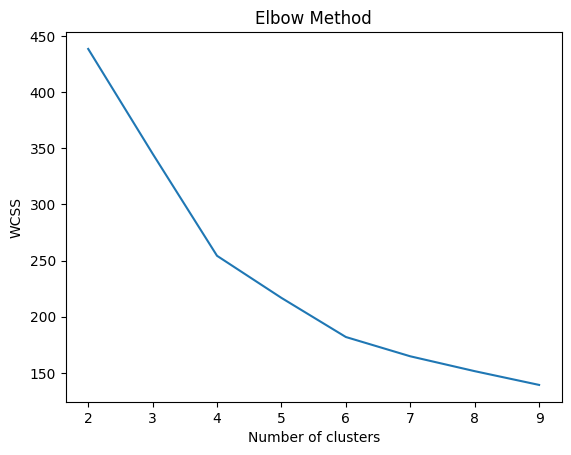

In [193]:
plt.plot(range(2, 10), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [194]:
kmeans = KMeans(n_clusters=4, random_state=0)
result=kmeans.fit(data[['Genre_Male', 'scaled_age','scaled_annual_income','scaled_spending_score']].values)

In [195]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
data_reduced=pca.fit_transform(data[['Genre_Male', 'scaled_age','scaled_annual_income','scaled_spending_score']].values)
data['result']=result

In [196]:
centroids_reduced=pca.transform(kmeans.cluster_centers_)
centroids_reduced

array([[-1.20415705,  0.92046946],
       [ 0.82335175,  1.032446  ],
       [ 1.06872303, -0.44740846],
       [-0.92259793, -0.82403818]])

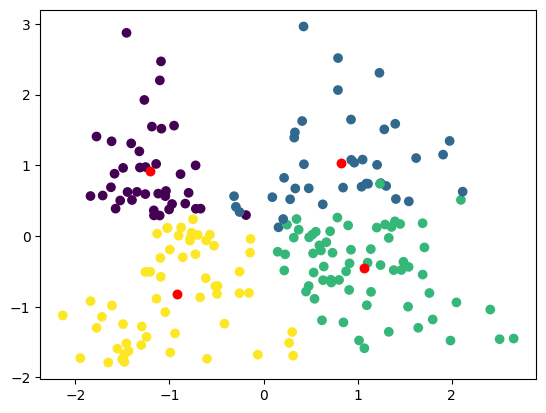

In [197]:
plt.figure('4 Cluster K-Means')
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=result.labels_)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], marker='.',s=150,c='r')

plt.show()

In [198]:
from joblib import dump, load
print(kmeans)
# save the model and scaler
dump(kmeans, 'kmeans_model.pkl')
dump(sc, 'scaler.pkl')


KMeans(n_clusters=4, random_state=0)


['scaler.pkl']

In [212]:
import warnings

# filter out the warning message
warnings.filterwarnings("ignore", message="X does not have valid feature names, but StandardScaler was fitted with feature names")
'''Function to predict the cluster for new data points'''

kmeans = load('kmeans_model.pkl')
scaler = load('scaler.pkl')

def predict_cluster(male ,age, income, score):
    scaled_data = scaler.transform([[male, age, income, score]])
    cluster = kmeans.predict(scaled_data)
    return cluster[0]

age = 18
income = 15
score = 90
male = 0
cluster = predict_cluster(male, age, income, score)
print(f"The data point with age={age}, income={income}, and score={score} belongs to cluster {cluster}")

The data point with age=18, income=15, and score=90 belongs to cluster 0


In [228]:
for i in range(10):
    # генеруємо випадкові значення
    male = random.randint(0, 1)
    age = random.randint(18, 80)
    income = random.randint(1, 150)
    score = random.randint(0, 100)

    # передаємо випадкові значення до функції predict_cluster
    cluster = predict_cluster(male, age, income, score)
    print(f"Data point with male={male} age={age}, income={income}, and score={score} belongs to cluster {cluster}")

Data point with male=0 age=54, income=66, and score=47 belongs to cluster 0
Data point with male=0 age=55, income=141, and score=7 belongs to cluster 1
Data point with male=1 age=55, income=94, and score=70 belongs to cluster 0
Data point with male=1 age=69, income=34, and score=94 belongs to cluster 0
Data point with male=1 age=28, income=115, and score=11 belongs to cluster 0
Data point with male=1 age=55, income=140, and score=50 belongs to cluster 0
Data point with male=1 age=46, income=96, and score=88 belongs to cluster 0
Data point with male=1 age=22, income=29, and score=15 belongs to cluster 0
Data point with male=1 age=34, income=34, and score=10 belongs to cluster 0
Data point with male=1 age=32, income=72, and score=64 belongs to cluster 0
